#### Before running this notebook, please make sure to run the `verification_crps_compute.ipynb` notebook to generate the pickle files.

In [1]:
import sys
sys.path.append('..')

import os
import pickle
import numpy as np
from matplotlib import pyplot as plt
from pysteps.verification.probscores import CRPS_compute

Pysteps configuration file found at: /home/gabriele/Documents/fbk/meteo/GPTCast/.venv/lib/python3.12/site-packages/pysteps/pystepsrc



In [2]:
input_data_path = '../data/verification_fts/'
output_data_path = '../data/verification_fts/'
tables_fn = 'tables_verification_crps.pkl'

mod_list = [
    {
        'name': 'gptcast_16x16',
        'label': 'GPTCast-16x16',
        'color': 'blue',
        'linestyle': '-',
    },
    {
        'name': 'gptcast_8x8',
        'label': 'GPTCast-8x8',
        'color': 'blue',
        'linestyle': '--',
    },
    {
        'name': 'linda',
        'label': 'Linda (Pysteps)',
        'color': 'black',
        'linestyle': '-',
    },
]

mod_names_list = [x['name'] for x in mod_list]
mod_labels = [x['label'] for x in mod_list]
mod_colors = [x['color'] for x in mod_list]
mod_linestyles = [x['linestyle'] for x in mod_list]

input_rankhist_fn = [os.path.join(input_data_path, mod_name, tables_fn) for mod_name in mod_names_list]
output_rankhist_fn = 'crps_all_mods'

In [3]:
# Fix thresholds, scales and preds times
pred_times = list(range(5, 125, 5))
crps_times = [15, 30, 60, 90, 120]
idx_crps_times = [i for i in range(len(pred_times)) if pred_times[i] in crps_times]

In [4]:
# load all crps tables
crps_tables = {}
for fn in zip(mod_names_list, input_rankhist_fn):
    mod_name, fn = fn
    with open(fn, 'rb') as f:
        crps_tables[mod_name] = pickle.load(f)
        crps_tables[mod_name] = [CRPS_compute(x) for x in crps_tables[mod_name]]
        

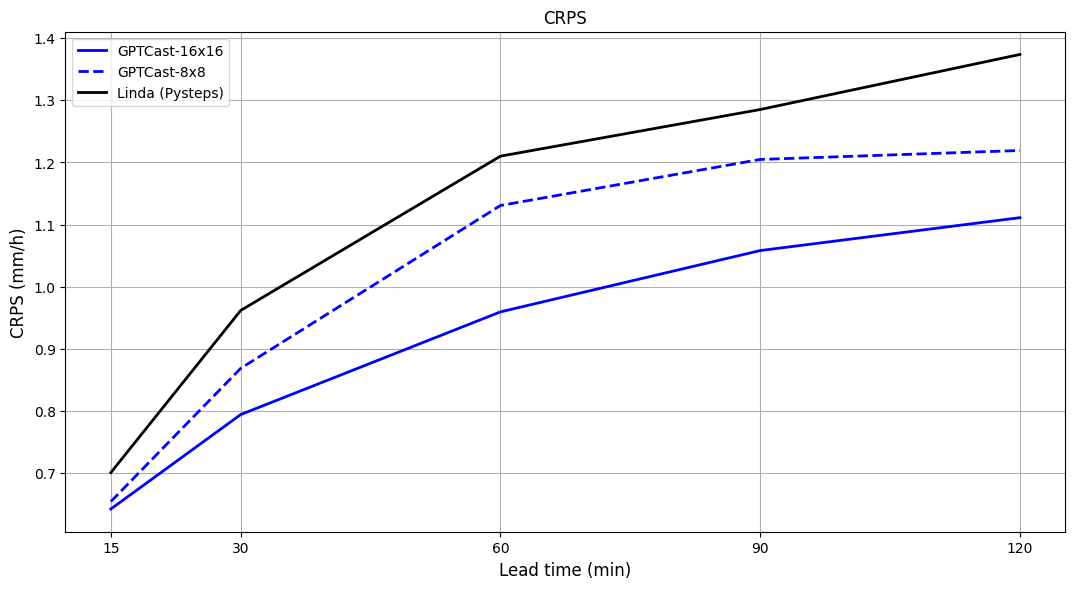

In [5]:
crps_plot_x_labels = np.array(crps_times)

fig = plt.figure(figsize = (10,5))
fig1 = fig.add_gridspec(1, 1, bottom = 0.0, top = 1.00, left = 0.0, right = 1.0) 
ax1 = fig.add_subplot(fig1[0,0])

# Plot the CRPS for both lead times

for mod_name, mod_label, c, ls in zip(mod_names_list, mod_labels, mod_colors, mod_linestyles):
    crps_plot_values = np.array(crps_tables[mod_name])[idx_crps_times]
    ax1.plot(crps_plot_x_labels, crps_plot_values, label=mod_label, linewidth=2, color=c, linestyle=ls)
    
# ax1.plot(crps_plot_x_labels, crps_plot_values, color='b', label='CRPS', linewidth=2)
ax1.set_xticks(crps_plot_x_labels)

ax1.set_xlabel("Lead time (min)", fontsize=12)
ax1.set_ylabel("CRPS (mm/h)", fontsize=12)

ax1.grid()

ax1.set_title("CRPS")
ax1.legend()

# plt.show()
plt.savefig(output_data_path + output_rankhist_fn, dpi=300, bbox_inches="tight")